# Prediction of Forex Movement (EUR/USD)

## Modelling & Evaluation

## Import packages

In [5]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import datetime
import numpy as np 
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import svm, preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import metrics 

In [6]:
forex = pd.read_excel('EUR-USD.xlsx')
print(forex.shape)
print(forex.dtypes)
forex.head(5)

(626, 7)
Time            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Binary_Close             int64
Volume                   int64
dtype: object


,Time,Open,High,Low,Close,Binary_Close,Volume
0,2019-01-02,1.14612,1.14967,1.13092,1.13121,0,455432
1,2019-01-03,1.13122,1.14110,1.13099,1.13899,1,494506
2,2019-01-04,1.13901,1.14189,1.13456,1.13943,1,403759
3,2019-01-06,1.13955,1.14129,1.13954,1.14102,1,12462
4,2019-01-07,1.14102,1.14826,1.14046,1.14789,1,362817


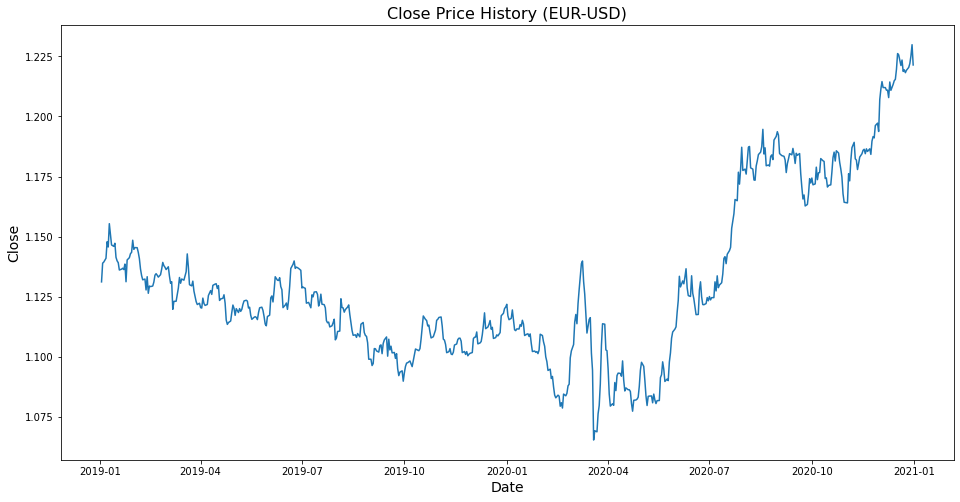

In [5]:
dates = [pd.Timestamp(date) for date in forex['Time']]
close = np.array(forex['Close'],dtype='float')
plt.figure(figsize=(16,8))
plt.title('Close Price History (EUR-USD)', fontsize = 16)
plt.plot(dates,close)
plt.ylabel('Close', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.show()

In [8]:
# SVM (kernel='rbf')
X = forex['Time']
X = X.values.reshape((-1, 1))
y = forex['Binary_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf.predict(X_train)
y_pred = svm_rbf.predict(X_train)
print("The Testing Accuracy is: ", svm_rbf.score(X_test, y_test))

The Testing Accuracy is:  0.49206349206349204


In [9]:
# SVM (kernel='poly')
X = forex['Time']
X = X.values.reshape((-1, 1))
y = forex['Binary_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr = svm.SVC(kernel='poly')
regr.fit(X_train, y_train)
regr.predict(X_train)
y_pred = regr.predict(X_train)
print("The Testing Accuracy is: ", regr.score(X_test, y_test))
print("The Testing Accuracy is (train): ", regr.score(X_train, y_train))

The Testing Accuracy is:  0.6349206349206349
The Testing Accuracy is (train):  0.522


In [10]:
# K NEAREST NEIGHBOURS

X = forex['Time']
X = X.values.reshape((-1, 1))
y = forex['Binary_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print("The Testing Accuracy is: ",knn.score(X_test, y_test))

The Testing Accuracy is:  0.5079365079365079
